## Машинное обучение: задание 1. Поляков Даниил, гр.494

### 1) Метод k ближайших соседей

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, neighbors 
import numpy as np
%pylab inline

C:\Users\Daniil\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
classification_problem = datasets.make_classification(n_samples=200, n_features =2, n_informative = 2, 
                                                      n_classes = 4, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=5)

In [3]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

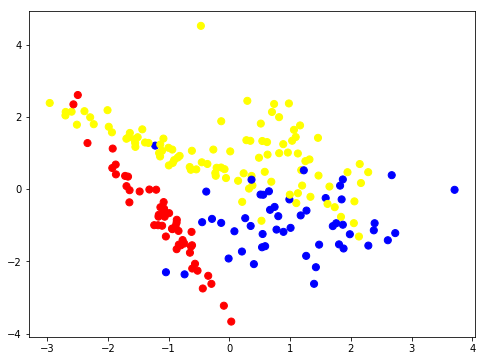

In [9]:
pylab.figure(figsize=(8,6))
pylab.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c=classification_problem[1], cmap=colors, s=50)

In [10]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [11]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [12]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

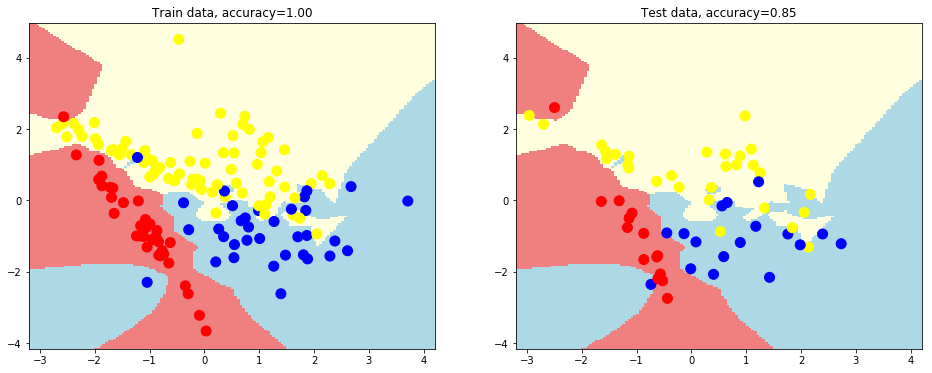

In [13]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

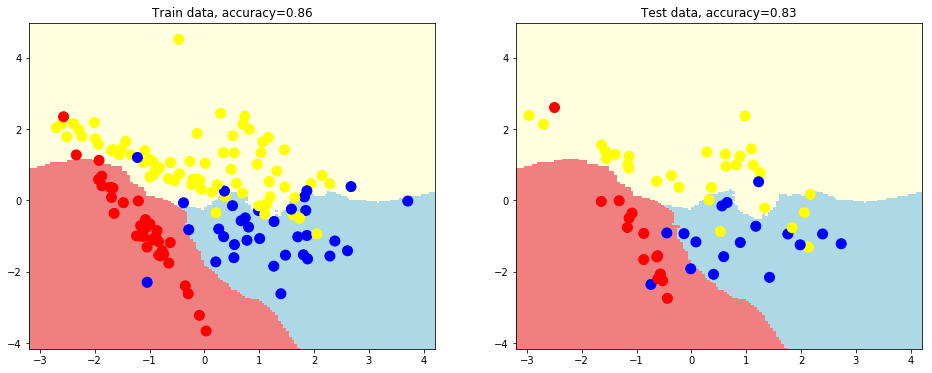

In [14]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

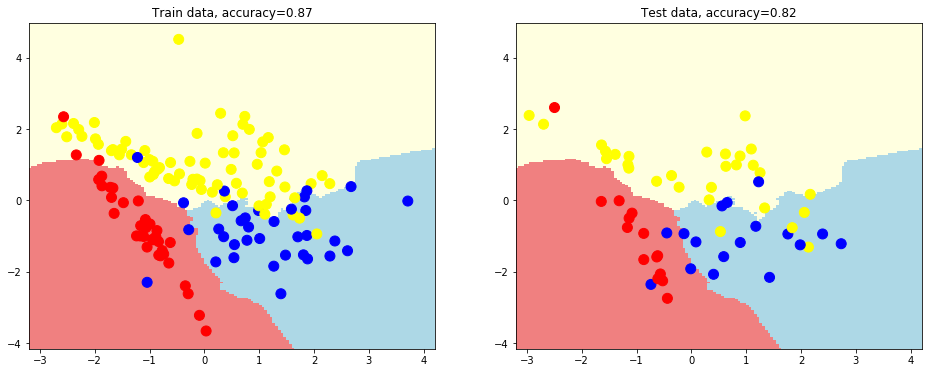

In [15]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=7)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

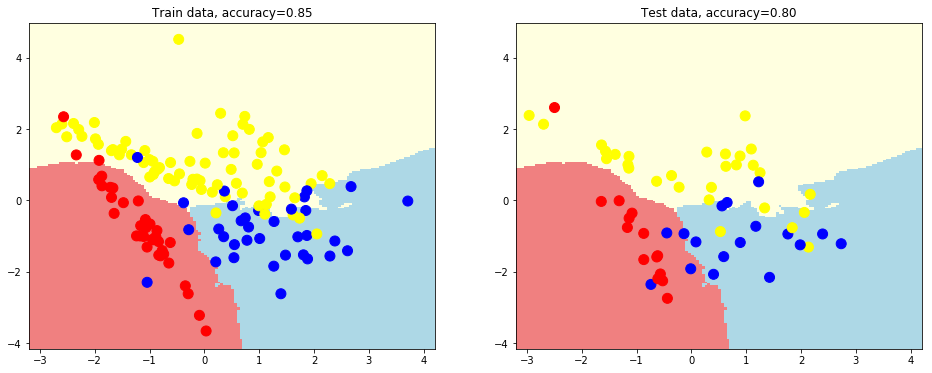

In [16]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

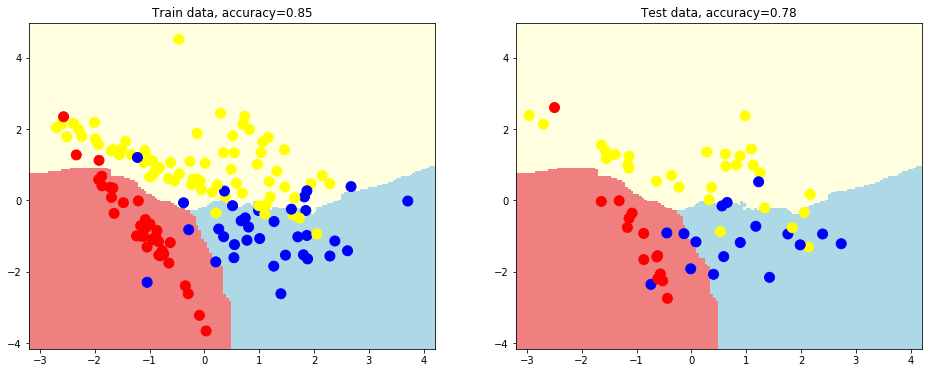

In [18]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=16)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [6]:
from sklearn.model_selection import cross_val_score
score = []
for i in range(1,30):
    clf = neighbors.KNeighborsClassifier(n_neighbors = i)
    score.append(np.mean(cross_val_score(clf, classification_problem[0], classification_problem[1], cv = 5)))
print("Оптимальное число соседей k = {}".format(np.argmax(score)))

Оптимальное число соседей k = 8


C:\Users\Daniil\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


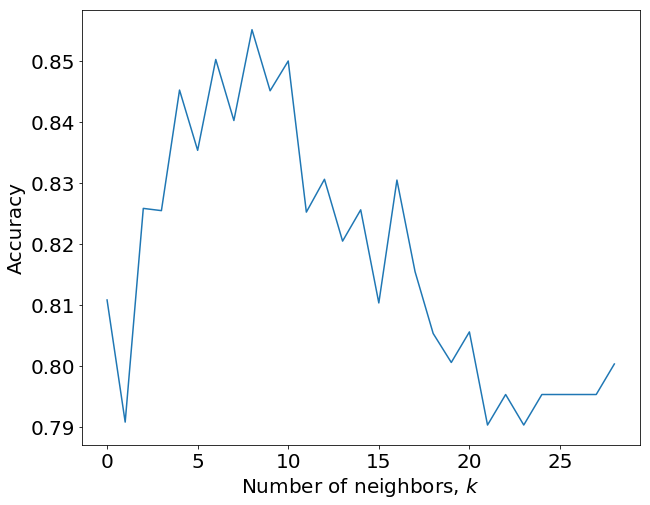

In [7]:
plt.figure(figsize=(10,8))
plt.plot(score)
plt.xlabel(r"Number of neighbors, $k$", fontsize=20)
plt.ylabel(r"Accuracy", fontsize=20)
plt.yscale('linear')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)

Кросс-валидация с 5 фолдами говорит, что оптимальное число соседей в этой задаче $k = 8$

### Задача 2. Наивный байесовский классификатор

In [86]:
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer

In [87]:
digits = load_digits()
cancer = load_breast_cancer()

In [88]:
data_digits = digits['data']
target_digits = digits['target']

data_cancer = cancer['data']
target_cancer = cancer['target']

In [89]:
print(data_cancer[2])

[  1.96900000e+01   2.12500000e+01   1.30000000e+02   1.20300000e+03
   1.09600000e-01   1.59900000e-01   1.97400000e-01   1.27900000e-01
   2.06900000e-01   5.99900000e-02   7.45600000e-01   7.86900000e-01
   4.58500000e+00   9.40300000e+01   6.15000000e-03   4.00600000e-02
   3.83200000e-02   2.05800000e-02   2.25000000e-02   4.57100000e-03
   2.35700000e+01   2.55300000e+01   1.52500000e+02   1.70900000e+03
   1.44400000e-01   4.24500000e-01   4.50400000e-01   2.43000000e-01
   3.61300000e-01   8.75800000e-02]


In [144]:
for i in cancer:
    print i

target_names
data
target
DESCR
feature_names


In [90]:
print(cancer["feature_names"])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [94]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_val_score

clf = GaussianNB()
print("GaussianNB mean accuracy at digits dataset = {}".format(np.mean(cross_val_score(clf, data_digits, target_digits))))
print("GaussianNB mean accuracy at cancer dataset = {}".format(np.mean(cross_val_score(clf, data_cancer, target_cancer))))

GaussianNB mean accuracy at digits dataset= 0.818600380355
GaussianNB mean accuracy at cancer dataset= 0.936749280609


In [95]:
clf = BernoulliNB()

print("BernoulliNB mean accuracy at digits dataset = {}".format(np.mean(cross_val_score(clf, data_digits, target_digits))))
print("BernoulliNB mean accuracy at cancer dataset = {}".format(np.mean(cross_val_score(clf, data_cancer, target_cancer))))

BernoulliNB mean accuracy at digits dataset = 0.825823650778
BernoulliNB mean accuracy at cancer dataset = 0.627420402859


In [96]:
clf = MultinomialNB()

print("MultinomialNB mean accuracy at digits dataset = {}".format(np.mean(cross_val_score(clf, data_digits, target_digits))))
print("MultinomialNB mean accuracy at cancer dataset = {}".format(np.mean(cross_val_score(clf, data_cancer, target_cancer))))

MultinomialNB mean accuracy at digits dataset = 0.870877148974
MultinomialNB mean accuracy at cancer dataset = 0.894579040193


Максимальное качество классификации на датасете breast_cancer выдал классификатор GaussianNB: precision = 0.94

Максимальное качество классификации на датасете digits выдал классификатор MultinomialNB: precision = 0.87

Верные утверждения: d) На вещественных признаках лучше всего сработало нормальное распределение.

## Задача 3. Метрики в задаче регрессии

In [63]:
mu, sigma = 0, 0.2 # mean and standard deviation
n = 500

In [64]:
x = np.linspace(0,10,n)

In [97]:
# f(x) = 0.5x+1+epsilon,   epsilon in N(mu, sigma)
def f(x):
    random = np.random.normal(mu, sigma, n)
    return 0.5*x+1+random

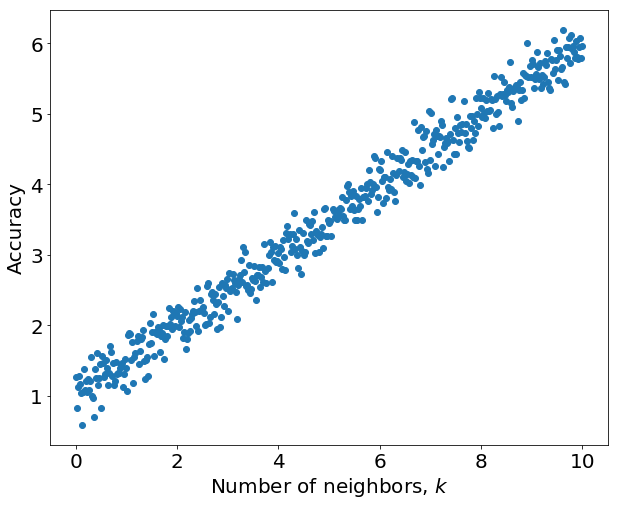

In [98]:
pylab.figure(figsize=(10,8))
pylab.scatter(x, f(x))
plt.xlabel(r"Number of neighbors, $k$", fontsize=20)
plt.ylabel(r"Accuracy", fontsize=20)
plt.yscale('linear')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
# create matrix A for MSE optimization
# we suggest that suitable function is y=kx+b 
A = np.array(zip(x, np.ones(n)))
y = f(x)

def MSE_of_linear_func(x):
    return mean_squared_error(A.dot(x), y)

In [69]:
from scipy.optimize import minimize
x0 = [0, 0]
res1 = minimize(MSE_of_linear_func, x0, method='Nelder-Mead', tol=1e-6)
print("MSE optimization gives k_1 = {} and b_1 = {}".format(res.x[0], res.x[1]))

MSE optimization gives k_1 = 0.504470044849 and b_1 = 0.976981418917


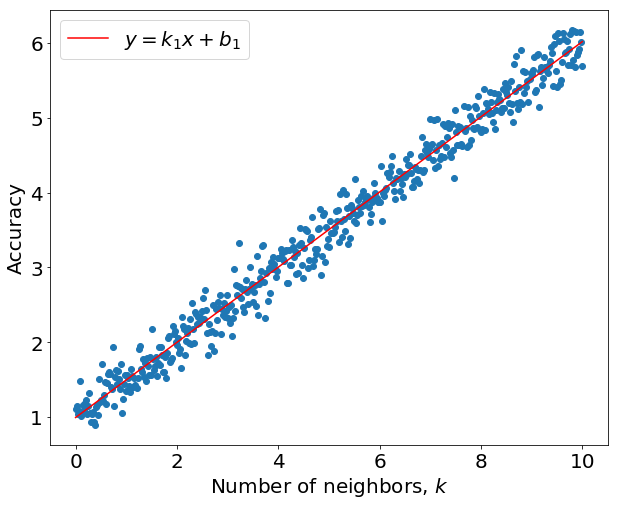

In [71]:
pylab.figure(figsize=(10,8))
pylab.scatter(x, y)
plt.plot(x, res1.x[0]*x+res1.x[1], c = 'r', label=r"$ y = k_{1}x+b_{1}$")

plt.xlabel(r"Number of neighbors, $k$", fontsize=20)
plt.ylabel(r"Accuracy", fontsize=20)
plt.yscale('linear')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)

In [72]:
# add some noise to argument
x_new = np.concatenate((x,np.linspace(0,10,75)), axis = 0)
print(shape(x_new))

(575L,)


In [73]:
# add some noise to argument
y1 = -1 + np.random.normal(mu, sigma, 75)
y_new = np.concatenate((y,y1), axis = 0)

In [74]:
from sklearn.metrics import mean_absolute_error
A_new = np.array(zip(x_new, np.ones(575)))

def MSE_of_linear_func(x):
    return mean_squared_error(A_new.dot(x), y_new)

def MAE_of_linear_func(x):
    return mean_absolute_error(A_new.dot(x), y_new)

In [75]:
from scipy.optimize import minimize
x0 = [0, 0]
res2 = minimize(MSE_of_linear_func, x0, method='Nelder-Mead', tol=1e-6)
print("MSE optimization gives k_2 = {} and b_2 = {}".format(res2.x[0], res2.x[1]))

MSE optimization gives k_2 = 0.435362787111 and b_2 = 0.744903486683


In [76]:
from scipy.optimize import minimize
x0 = [0, 0]
res3 = minimize(MAE_of_linear_func, x0, method='Nelder-Mead', tol=1e-6)
print("MAE optimization gives k_3 = {} and b_3 = {}".format(res3.x[0], res3.x[1]))

MAE optimization gives k_3 = 0.502068215996 and b_3 = 0.959702658493


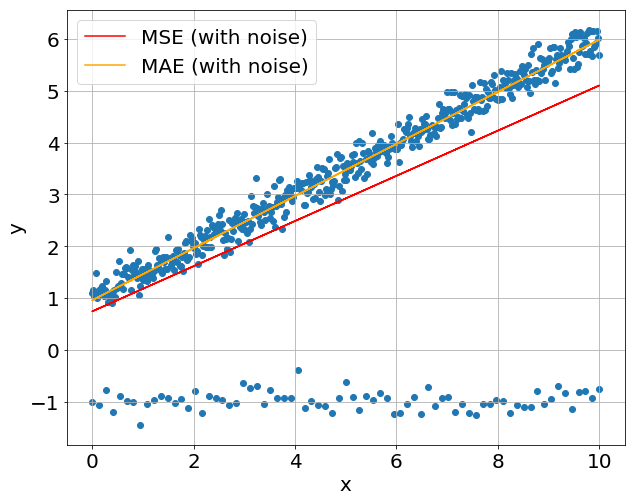

In [84]:
pylab.figure(figsize=(10,8))
pylab.scatter(x_new, y_new)
#plt.semilogy(x_new, res1.x[0]*x_new+res1.x[1], c = 'black', label=r"MSE")
plt.semilogy(x_new, res2.x[0]*x_new+res2.x[1], c = 'r', label=r"MSE (with noise)")
plt.semilogy(x_new, res3.x[0]*x_new+res3.x[1], c = 'orange', label=r"MAE (with noise)")
plt.xlabel(r"x", fontsize=20)
plt.ylabel(r"y", fontsize=20)
plt.grid()
plt.yscale('linear')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)

#### Вывод: 
Модель, оптимизирующая MAE, более устойчива к выбросам чем модель, оптимизирующая MSE.

#### 4.1 Наивный байес и центроидный классификатор
Покажите, что если в наивном байесовском классификаторе классы имеют одинаковые априорные вероятности, а плотность распределения признаков в каждом классе имеет вид 
$$
P(x^{(k)}|y) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{ (x^{(k)} - \mu_{yk})^2 }{ 2\sigma^2} \right)
$$
где $x^{(k)}, k = 1,...,n - $ признаки объекта $x$, то классификация сводится к отнесению объекта $x$ к классу $y$, центр которого $µ_y$ ближе всего к $x$.

На лекции было показано, что наивный байесовский классификатор ищет функцию $a(x)$ такую, что
$$
a(x) = \underset{y}{\arg \max} \ P(y) \cdot \prod_{k=1}^n P(x^{(k)}|y)
$$

По условию классы имеют одинаковые априорные вероятности $P(y)$, поэтому величину $P(y)$ можно не учитывать в выражении для $a(x)$. Прозведение плотностей распределения признаков даст многомерное нормальное распределение:
$$
a(x) = \underset{y}{\arg \max} \ \frac{1}{(2 \pi \sigma^2)^{\frac{n}{2}}} \exp \left(-\frac{ ({\bf x - \mu_{y}} )^{\top}({\bf x - \mu_{y}})} { 2 \sigma^2} \right)
$$
Максимум полученной функции достигается, когда выражение в экспоненте
$$
({\bf x - \mu_{y}} )^{\top}({\bf x - \mu_{y}})
$$
минимально. То есть исходная задача свелвсь к следующей:
$$
\|{\bf x - \mu_{y}} \|_2 \rightarrow \min  \ \ \ \ (*)
$$

Вторая норма есть евклидово расстояние. Поэтому задача $(*)$ показывает, что объект $x$ будет отнесен к классу $y$, центр которого $\mu_y$ ближе всего к $x$. Что и требовалось показать.

#### 4.2 ROC-AUC случайных ответов
Покажите, что «треугольный ROC-AUC» (см.лекцию 2) в случае, когда классификатор дает случайные ответы $a(x)=1$ с вероятностью $p$ и $a(x)=0$ с вероятностью $(1-p)$, будет в среднем равен 0.5, независимо от $p$ и доли первого класса в обучающей выборке.

В этой задаче требуется показать, что при бинарной классификации кривая ROC-AUC будет иметь вид $y=x$ (и тогда площадь под кривой будет равна 0.5). 
По осям ROC кривой откладываются следующие величины:
$$
\text{FPR} = \frac{\text{FP}}{\text{FP+TN}}
$$

$$
\text{TPR} = \frac{\text{TP}}{\text{TP+FN}}
$$
Покажем, что в случае классификатора со случайными ответами имеет место следующее соотношение: $\text{FPR} = \text{TPR}$, тем самым $ROC$ кривая будет иметь вид $y = x$ и AUC-ROC будет треугольным (площадь равна 0.5).

Пусть всего в выборке $N$ объектов, и $N_1$ из них принадлежат к первому классу (положительные ответы). Тогда соответственно $N_2 = N-N_1$ объектов принадлежат ко второму классу (отрицательные ответы). 

Если классификатор дает положительные ответы с вероятностью $p$, то $N_1 \cdot p $ объектов будет отнесено к первому классу (это будет true positive) и $N_1 \cdot (1-p)$ ко второму классу (false negative). Следовательно $\text{TP} = N_1 \cdot p $, а $\text{FN} = N_1 \cdot (1-p)$. Следовательно
$$
\text{TPR} = \frac{\text{FP}}{\text{FP+TN}} = \frac{N_1 p}{N_1 p + N_1 (1-p)} = \frac{p}{p+1-p} = p
$$

Аналогично для второго класса: случайный классификатор отнесет $N_2 = N-N_1 \cdot p $ объектов к первому классу (это будет false positive) и $(N-N_1) \cdot (1-p)$ ко второму классу (true positive). Следовательно
$$
\text{FPR} = \frac{\text{FP}}{\text{FP+TN}} = \frac{(N-N_1)p}{(N-N_1)p + (N-N_1)(1-p)} = p = \text{TPR}
$$
Значит ROC кривая имеет вид $y = x$ независимо от $p$ и доли класса 1 в обучающей выборке, что и требовалось показать.

#### 4.3 Ошибка 1NN и оптимального байесовского классификатора

Пусть есть задача бинарной классификации, решаемая с помощью $1NN$. Пусть есть фиксированный объект $x$, который нужно классифицировать. Пусть $x_n$ - ближайший к $x$ сосед. Пусть $y$ - настоящий класс $x$, а $y_n$ - класс $x_n$. Метод ближайшего соседа ошибвется с вероятностью

$$
E_N = P(y \neq y_n)
$$

Будем писать $x \in \{0\}$, если объект $x$ принадлежит классу ${0}$ и $x \in \{1\}$, если $x$ принадлежит классу ${1}$. Тогда

$$
E_N = P(y \neq y_n) = P(x \in \{0\}, x_n \in \{1\}) + P(x \in \{1\}, x_n \in \{0\}) = 
$$

(принадлежность к классам 0 и 1 для объектов $x$ и $x_n$ сказано считать независимыми событиями)

$$
= P(x \in \{1\}) \cdot P(x_n \in \{0\}) + P(x \in \{0\}) \cdot P(x_n \in \{1\}) = P(1|x) \cdot P(0|x_n) + P(0|x) \cdot P(1|x_n)
$$

Если в обучающей выборке число точек стремится к бесконечности, то ближайший сосед объекта $x - $ объект $x_n$, будет стремиться к $x$. Это значит, что

$$
\underset{n \rightarrow \infty}{\lim} \left(P(1|x) \cdot P(0|x_n) + P(0|x) \cdot P(1|x_n) \right) = 2 \cdot P(0|x) \cdot P(1|x)
$$

Если учесть, что байесовский классификатор ошибается на объекте $x$ с вероятностью
$$
E_B = \{\min{P(1|x), P(0|x)}\},
$$
то выражение для мат. ожидания ошибки 1NN примет вид
$$
E_N = 2 \cdot P(0|x) \cdot P(1|x) = 2 E_B (1-E_B) \le \left/ (1-E_B) \le 1 \right/ \le 2 E_B
$$
Таким образом, метод одного ближайшего соседа асимптотически имеет мат.ожидание ошибки не более чем вдвое больше по сравнению с оптимальным байесовским классификатором. Что и требовалось показать.